In [1]:
!pip install opencv-python


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (720, 1280, 3)


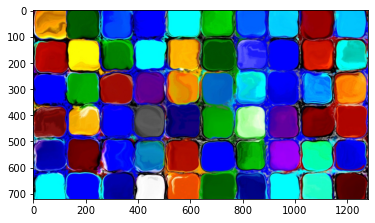

In [3]:
image = cv2.imread('colours.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

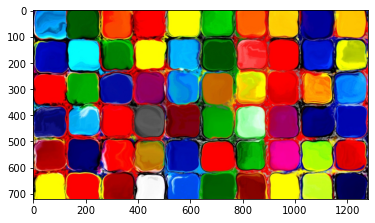

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

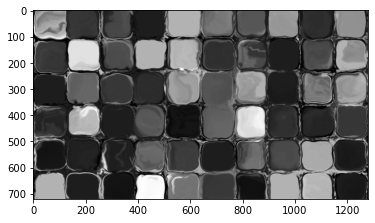

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

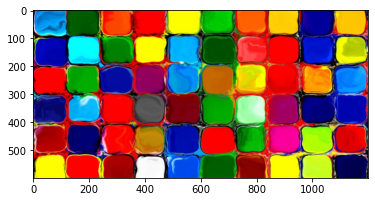

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([  6.61397132,   6.51437446, 105.69711189]),
 array([242.43016999,   6.79314683,   5.12964797]),
 array([232.40170913, 234.24983006,   8.57453145]),
 array([  8.55123433, 202.24931426, 248.41888715]),
 array([  8.31083389, 173.800698  ,   5.40899978]),
 array([203.4895436 , 233.23951072, 207.53071156]),
 array([28.64426912, 19.00867002, 20.98794867]),
 array([ 97.80181467, 101.32890868,  92.88927161]),
 array([149.47077143,   9.43978149,   9.44810333]),
 array([  7.66260409, 122.18183195, 229.76184709]),
 array([220.84887006, 107.77980713,  19.0862556 ]),
 array([242.18693057,   7.51806472, 147.46308514]),
 array([152.93565532,  10.46239964,  87.775981  ]),
 array([  4.28792745,  13.20947478, 172.18798413]),
 array([ 6.0076728 , 98.28324338,  4.35112816])]

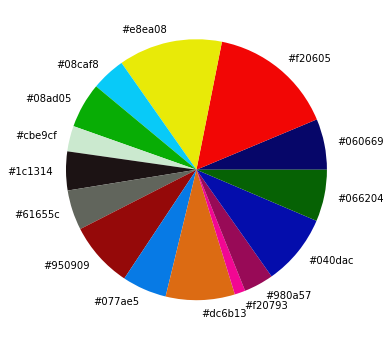

In [10]:
get_colors(get_image('colours.jpeg'), 15, True)

In [11]:
IMAGE_DIRECTORY = 'Untitled Folder'
COLORS = {
     'RED':[255,69,0],
        'GREEN':[0,100,0],
        'WHITE':[255,255,255],
        'VIOLET':[255,0,255],
        'PINK':[255,20,147],
        'ORANGE':[255,165,0],
        'YELLOW':[252, 237, 86],
        'LEAF GREEN':[0,128,0],
        'PURPLE':[91, 165, 255],
        'ORANGE':[255,140,0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

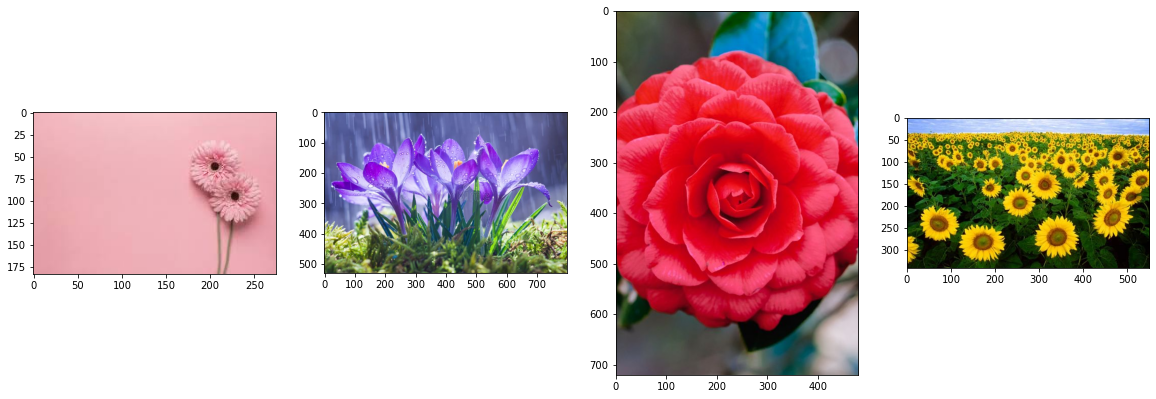

In [12]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [13]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [14]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

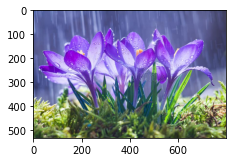

In [15]:
# Search for purple
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['VIOLET'], 60, 5)

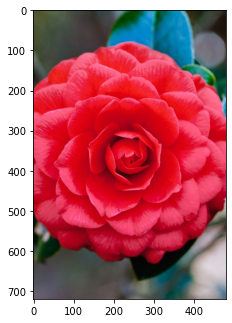

In [16]:
# Search for RED
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)